In [2]:
import os
from pathlib import Path
os.getcwd()
from tifffile import imread
from oneat.NEATModels import NEATSynamic
from oneat.pretrained import  get_model_folder
from oneat.NEATModels.config import dynamic_config
from oneat.NEATUtils import helpers
from oneat import test_image_xenopus
from oneat.NEATUtils.helpers import load_json
example_directory = os.getcwd() + '/hela_example_xenopus_nosegmentation/'
results_directory = example_directory + '/Results_xenopus_nosegmentation/'
Path(example_directory).mkdir(exist_ok=True)
Path(results_directory).mkdir(exist_ok=True)
model = NEATSynamic.local_from_pretrained(example_directory,'Cellsplitdetectorxenopus')



class <class 'oneat.NEATModels.neat_faststandard.NEATSynamic'> name Cellsplitdetectorxenopus
Found model 'Cellsplitdetectorxenopus' for 'NEATSynamic'.


In [4]:
imagename = test_image_xenopus(example_directory)
print(Path(imagename))

2230894592/2230882483 [==============================] - 298s 0us/step
C:\Users\rando\.keras\datasets\xenopus


In [5]:
n_tiles = (4,4)
event_threshold = 0.999
event_confidence = 0.9
iou_threshold = 0.1
fidelity = 4
downsamplefactor = 1
start_project_mid = 4
end_project_mid = 1
model.predict_synamic(imagename,
                           results_directory, 
                           n_tiles = n_tiles, 
                           event_threshold = event_threshold, 
                           event_confidence = event_confidence,
                           iou_threshold = iou_threshold,
                           fidelity = fidelity,
                           downsamplefactor = downsamplefactor,
                           start_project_mid = start_project_mid,
                           end_project_mid = end_project_mid )

Image (41, 22, 1112, 1112) is 4 dimensional, projecting around the center 11 - 4 to 11 + 1
C:\Users\rando\Downloads\CAPED-AI-oneat\Demo/hela_example_xenopus_nosegmentation/ Cellsplitdetectorxenopus {'Normal': 0, 'Division': 1} {'x': 0, 'y': 1, 't': 2, 'h': 3, 'w': 4, 'c': 5}
Detecting event locations


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [57:20<00:00, 83.91s/it]


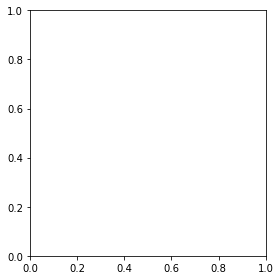

In [6]:
from oneat.NEATUtils import NEATViz

imagedir = example_directory
heatmapdir = results_directory
csvdir = heatmapdir
categories_json = example_directory + 'Cellsplitcategoriesxenopus.json'
fileextension = '*tif'
thresh = 1 - 1.0E-6

event_threshold = [thresh, thresh]
Vizdetections = NEATViz(imagedir, 
                        heatmapdir, 
                        csvdir, 
                        categories_json,  
                        event_threshold, 
                        fileextension = fileextension,
                        start_project_mid = start_project_mid,
                        end_project_mid = end_project_mid)